In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import re
from functools import reduce
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [123]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [124]:
input_dir = Path(r'C:\Users\libin\UCSF\MECP2\compare_element\1206_new_element_set\ATAC')
file_paths = input_dir.glob('**/*.tab')
file_path_list = [str(path) for path in file_paths]

In [125]:
print (file_path_list)

['C:\\Users\\libin\\UCSF\\MECP2\\compare_element\\1206_new_element_set\\ATAC\\total_negative_elements_score_per_element_ATAC_original.tab', 'C:\\Users\\libin\\UCSF\\MECP2\\compare_element\\1206_new_element_set\\ATAC\\total_positive_elements_score_per_element_ATAC_original.tab']


In [126]:
df_list = []
for file in file_path_list:
    file_name = file.split("\\")[-1]
    basename = "".join(re.findall(r'(.+)_score', file_name))
    # basename2 = "".join(re.findall(r'(.+)?_(?:\bp0.01|\b2sg)', file_name))
    dataframe = pd.read_csv(file, sep="\t", skiprows=1, names=["chr", "start", "end", "{}".format(basename)])
    #print (basename)
    #print ("number of elements:", dataframe.shape[0])
    df_list.append(dataframe)

In [127]:
#df_high_160_specific = pd.merge(df_list[0], df_list[2], how='outer', indicator=True)
#df_high_160_specific = df_high_160_specific[df_high_160_specific['_merge'] == "left_only"]
#df_high_160_specific = df_high_160_specific[["chr", "start", "end", "160_high"]]


#df_M_160_specific = pd.merge(df_list[1], df_list[3], how='outer', indicator=True)
#df_M_160_specific = df_M_160_specific[df_M_160_specific['_merge'] == "left_only"]
#df_M_160_specific = df_M_160_specific[["chr", "start", "end", "160_M"]]

In [131]:
#df_gr_high = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), [df_list[2], df_high_160_specific, df_list[4]])
#print (df_gr_high[["240_high", "160_high", "unenriched_high"]].describe())

#df_gr_high_melt = pd.melt(df_gr_high, value_vars=["240_high", "160_high", "unenriched_high"], value_name="score", var_name="condition")

neg_sampled = df_list[0].sample(n=df_list[1].shape[0])
df_gr1 = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), [neg_sampled, df_list[1]])
# df_gr1 = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), [df_list[0], df_list[1]])
print (list(df_gr1))
#df_gr1 = df_gr1.rename(columns={"#1-1_i_240_p0.01_fcfdr0.05_2sg_elements": "1-1_i_240", "#1-2_i_160_2sg_elements_specific": "1-2_i_160", "#1-3_i_negative_elements": "1-3_i_negative"}, errors="raise")
print (df_gr1[['total_negative_elements', 'total_positive_elements']].describe())
df_gr1_melt = pd.melt(df_gr1, value_vars=['total_negative_elements', 'total_positive_elements'], value_name="score", var_name="condition")

stats.ks_2samp(df_gr1["total_negative_elements"], df_gr1["total_positive_elements"])

['chr', 'start', 'end', 'total_negative_elements', 'total_positive_elements']
       total_negative_elements  total_positive_elements
count                92.000000                92.000000
mean                  0.727037                 1.108657
std                   0.316261                 0.533169
min                   0.353789                 0.350255
25%                   0.537698                 0.699806
50%                   0.614664                 1.014100
75%                   0.873001                 1.311224
max                   2.176454                 2.795598


Ks_2sampResult(statistic=0.2065217391304348, pvalue=0.000629058695387329)

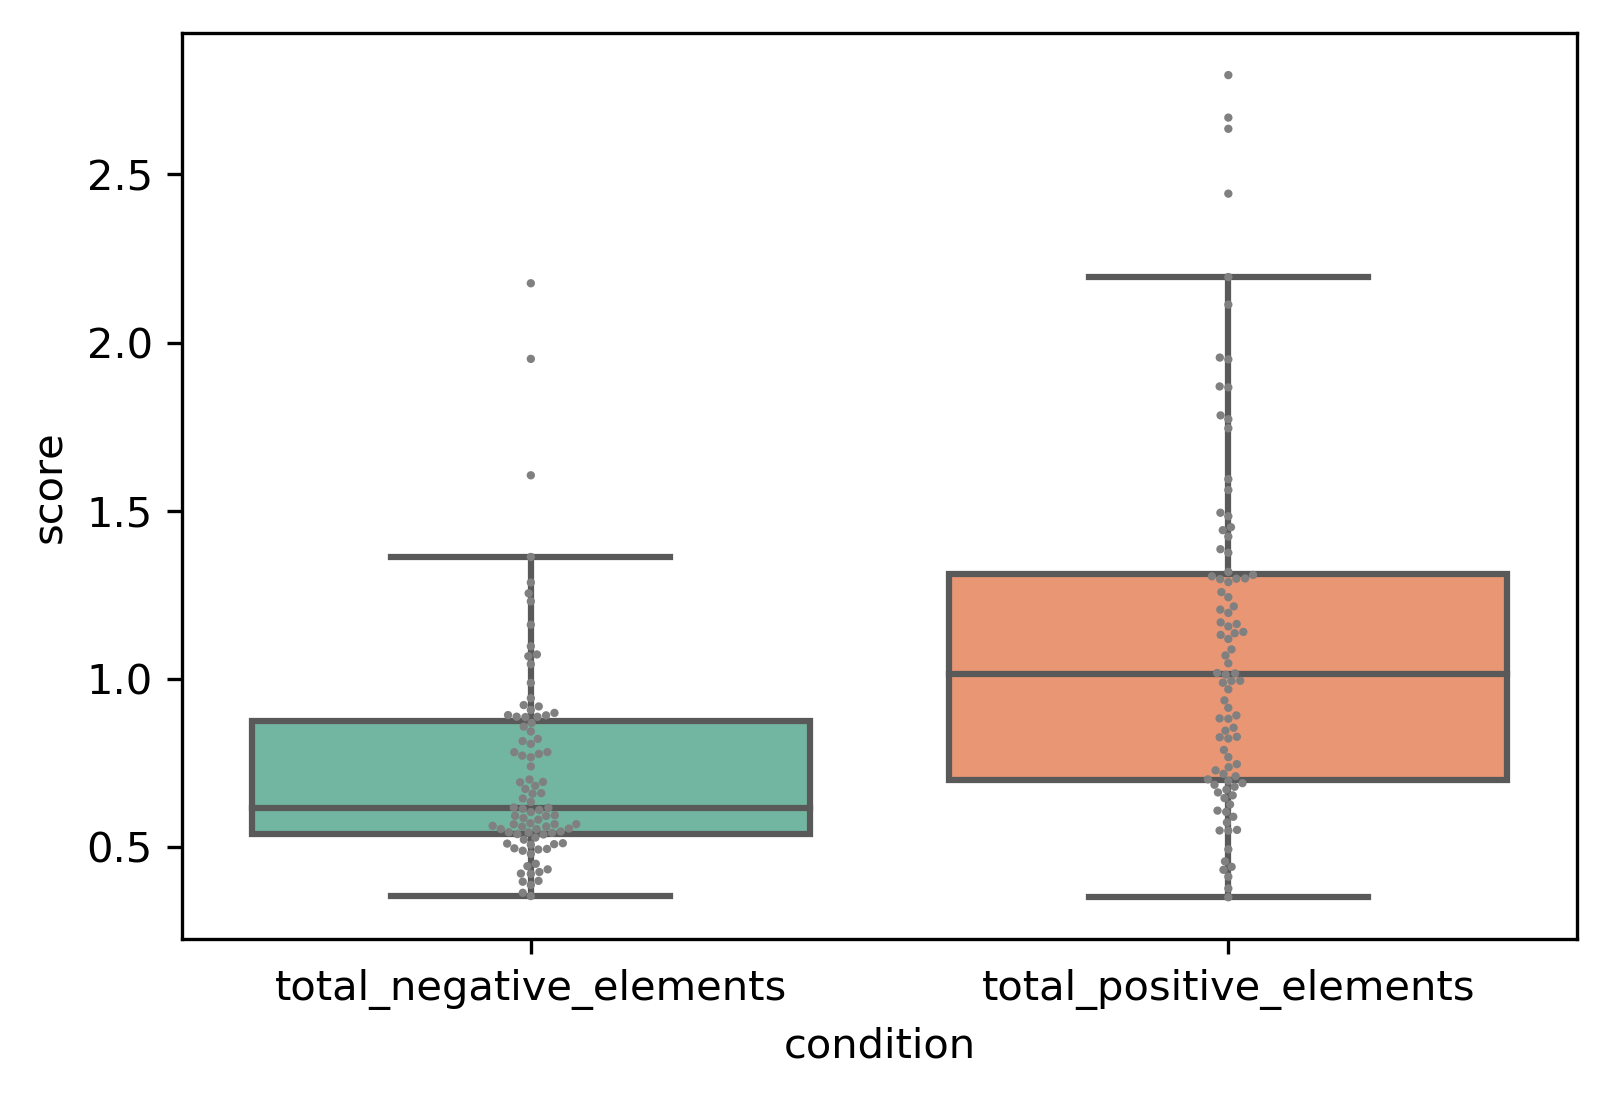

In [132]:
sns.boxplot(x="condition", y="score", data=df_gr1_melt, palette="Set2", showfliers = False)
sns.swarmplot(x="condition", y="score", data=df_gr1_melt, color="grey", size=2)

In [91]:
df_gr2 = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), [df_list[3], df_list[4], df_list[5]])
#print (list(df_gr2))
df_gr2 = df_gr2.rename(columns={"#2-1_n_240_p0.01_fcfdr0.05_3sg_elements": "2-1_n_240", "#2-2_n_160_3sg_elements_specific": "2-2_n_160", "#2-3_n_negative_elements": "2-3_n_negative"}, errors="raise")
print (df_gr2[["2-1_n_240", "2-2_n_160", "2-3_n_negative"]].describe())data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPHN2ZyB3aWR0aD0iMzU4cHgiIGhlaWdodD0iMzU2cHgiIHZpZXdCb3g9IjAgMCAzNTggMzU2IiB2ZXJzaW9uPSIxLjEiIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIgeG1sbnM6eGxpbms9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsiPgogICAgPCEtLSBHZW5lcmF0b3I6IFNrZXRjaCA0OC4xICg0NzI1MCkgLSBodHRwOi8vd3d3LmJvaGVtaWFuY29kaW5nLmNvbS9za2V0Y2ggLS0+CiAgICA8dGl0bGU+TG9nby0yPC90aXRsZT4KICAgIDxkZXNjPkNyZWF0ZWQgd2l0aCBTa2V0Y2guPC9kZXNjPgogICAgPGRlZnM+CiAgICAgICAgPGNpcmNsZSBpZD0icGF0aC0xIiBjeD0iMTc5IiBjeT0iMTc5IiByPSIxNzkiPjwvY2lyY2xlPgogICAgPC9kZWZzPgogICAgPGcgaWQ9IlN5bWJvbHMiIHN0cm9rZT0ibm9uZSIgc3Ryb2tlLXdpZHRoPSIxIiBmaWxsPSJub25lIiBmaWxsLXJ1bGU9ImV2ZW5vZGQiPgogICAgICAgIDxnIGlkPSJMb2dvLTIiPgogICAgICAgICAgICA8ZyBpZD0iR3JvdXAiPgogICAgICAgICAgICAgICAgPG1hc2sgaWQ9Im1hc2stMiIgZmlsbD0id2hpdGUiPgogICAgICAgICAgICAgICAgICAgIDx1c2UgeGxpbms6aHJlZj0iI3BhdGgtMSI+PC91c2U+CiAgICAgICAgICAgICAgICA8L21hc2s+CiAgICAgICAgICAgICAgICA8dXNlIGlkPSJPdmFsLTMiIGZpbGw9IiMxQTMwRDciIHhsaW5rOmhyZWY9IiNwYXRoLTEiPjwvdXNlPgogICAgICAgICAgICAgICAgPHBhdGggZD0iTTIwMi41MTI0NDksNDMwLjcyNzYzNiBDMTkxLjQyMjQ2NywzODEuNjM5MjM1IDIxOC4xMDE0MTEsMzA1LjE4NTE3OSAyMzQuODM1NjEzLDI5NC43Mzk5MDkgQzI2My4yOTU3ODMsMjkxLjgyMDc3MSAzMDguMjczOTY3LDI0NC43MjU1NTkgMzA4LjI3Mzk2NywxOTYuNDk2NjEgQzMwOC4yNzM5NjcsMTEzLjE5MjMyNCAyNjYuMTU1MjUxLDYzLjI3MDQyMTQgMjQwLjQzNDQ5Myw0Ni42MjY4OTgyIEMyMzAuNjc4OTcsNDAuMzE0MjQzIDIxOS43OTM5MTEsODMuMzAwMDc1MSAyMjIuNTgwNDc5LDEwMi42NDQ1ODkgQzE1Ni43Nzk4OTcsOTQuMTcxNDU0NyAxMjcuMDU3MzgzLDEzMC4zMDI1IDExNS45NjIyODgsMTM2LjYwMjI4NSBDMTEwLjE4OTYwNCwxMzIuMDM0MTI3IDY1LjE5NzMwOTgsODIuMTQ0NDQyNCA1MS40MTMwNjcxLDk0LjYwNDUwNDQgQzQzLjY1NDExMjYsMTI2LjA3NjM5OCA1OC42NDIyOCwyMjUuMTc4ODA3IDg3Ljc4NDg5MiwyNTEuMTA5MzUgQzc5LjA0NTE5NTMsMjgxLjEyNjY1OCAxMy4zNDgzMzQ1LDMxMy4zMTAwMDYgNiwzMTcuNjkzNDY0IiBpZD0iUGF0aC0xMSIgZmlsbD0iI0ZGRkZGRiIgbWFzaz0idXJsKCNtYXNrLTIpIj48L3BhdGg+CiAgICAgICAgICAgICAgICA8cGF0aCBkPSJNMjQzLjc1MDE5OSwxODAuMDkxNzgzIEMyNDguNTM1MTYsMTgwLjI0MjYxMyAyNTMuMDYzMjY2LDE3NS42NzA3IDI1My4wNjMyNjYsMTcwLjA3MjMxOSBDMjUzLjA2MzI2NiwxNjQuNDczOTM4IDI0OC42ODg2NSwxNTkuMjEzMzU5IDI0My4xNDIxNzEsMTU5LjA0MTk0MyBDMjM3LjU5NTY5MywxNTguODcwNTI3IDIzMy45NjM0NjIsMTY0Ljc5MDM5OSAyMzMuNzY5MzY3LDE2OS41MjQ2MDcgQzIzMy41NzUyNzEsMTc0LjI1ODgxNSAyMzguOTY1MjM4LDE3OS45NDA5NTIgMjQzLjc1MDE5OSwxODAuMDkxNzgzIFoiIGlkPSJPdmFsLTQiIGZpbGw9IiMxQTMwRDciIG1hc2s9InVybCgjbWFzay0yKSIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQzLjQxMzc3MCwgMTY5LjU2Njg1Nykgcm90YXRlKC0yNC4wMDAwMDApIHRyYW5zbGF0ZSgtMjQzLjQxMzc3MCwgLTE2OS41NjY4NTcpICI+PC9wYXRoPgogICAgICAgICAgICAgICAgPHBhdGggZD0iTTE4OS41MzQxMzMsMjA4LjAzODExNyBDMTk1LjMzMzEyMywyMDguMDM4MTE3IDIwMC44ODI3MDgsMjAzLjkzNDk1OSAyMDAuODgyNzA4LDE5OC4xMzU5NjkgQzIwMC44ODI3MDgsMTkyLjMzNjk3OSAxOTQuODgxMTU2LDE4Ni43MDA0MTUgMTg5LjA4MjE2NiwxODYuNzAwNDE1IEMxODMuMjgzMTc2LDE4Ni43MDA0MTUgMTc4LjQ4NTk3OCwxOTEuNTQwNjg3IDE3OC40ODU5NzgsMTk3LjMzOTY3NyBDMTc4LjQ4NTk3OCwyMDMuMTM4NjY3IDE4My43MzUxNDQsMjA4LjAzODExNyAxODkuNTM0MTMzLDIwOC4wMzgxMTcgWiIgaWQ9Ik92YWwtNC1Db3B5IiBmaWxsPSIjMUEzMEQ3IiBtYXNrPSJ1cmwoI21hc2stMikiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OS42ODQzNDMsIDE5Ny4zNjkyNjYpIHJvdGF0ZSgxMy4wMDAwMDApIHRyYW5zbGF0ZSgtMTg5LjY4NDM0MywgLTE5Ny4zNjkyNjYpICI+PC9wYXRoPgogICAgICAgICAgICAgICAgPHBhdGggZD0iTTIzOS4wNjMxNTUsMjE3LjM1NDI5NSBDMjQzLjY5OTE0LDIxMy44NTc0OTcgMjQ0LjU4NDk4NCwyMDYuNDMwMzExIDI0Mi43NjU4MDgsMjAzLjk2Nzc4IEMyMzcuODU5NTE4LDIwMS45MjYxOCAyMjcuODU5MDkzLDIwNC45NTAxNDIgMjI2LjA4ODA3NiwyMTMuNDQxNzM1IEMyMjguNTc5NDg4LDIxNi4zOTU3MjMgMjMyLjgyODY5LDIxNy4yODk0MDkgMjM5LjA2MzE1NSwyMTcuMzU0Mjk1IFoiIGlkPSJPdmFsLTQtQ29weS0yIiBmaWxsPSIjMUEzMEQ3IiBtYXNrPSJ1cmwoI21hc2stMikiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzNC44Njc1NzcsIDIxMC4zNTQwOTkpIHJvdGF0ZSgtMy4wMDAwMDApIHRyYW5zbGF0ZSgtMjM0Ljg2NzU3NywgLTIxMC4zNTQwOTkpICI+PC9wYXRoPgogICAgICAgICAgICAgICAgPHBhdGggZD0iTTIzOCwyMTQgTDI0MSwyMjEiIGlkPSJQYXRoLTMiIHN0cm9rZT0iIzFBMzBENyIgc3Ryb2tlLXdpZHRoPSI0IiBzdHJva2UtbGluZWNhcD0icm91bmQiIHN0cm9rZS1saW5lam9pbj0icm91bmQiIG1hc2s9InVybCgjbWFzay0yKSI+PC9wYXRoPgogICAgICAgICAgICAgICAgPGNpcmNsZSBpZD0iT3ZhbC0xMSIgZmlsbD0iIzFBMzBENyIgb3BhY2l0eT0iMC4xMDE1MDU4ODgiIG1hc2s9InVybCgjbWFzay0yKSIgY3g9IjI1OCIgY3k9IjE5MCIgcj0iNiI+PC9jaXJjbGU+CiAgICAgICAgICAgICAgICA8Y2lyY2xlIGlkPSJPdmFsLTExLUNvcHkiIGZpbGw9IiMxQTMwRDciIG9wYWNpdHk9IjAuMDc5OTM2NTk0MiIgbWFzaz0idXJsKCNtYXNrLTIpIiBjeD0iMjA4LjUiIGN5PSIyMjIuNSIgcj0iNi41Ij48L2NpcmNsZT4KICAgICAgICAgICAgICAgIDxwYXRoIGQ9Ik0zMDUsMjEwLjk3MTEwMiBMMzE3LjU3NjQ1MiwyMDkiIGlkPSJQYXRoLTE2IiBzdHJva2U9IiNGRkZGRkYiIHN0cm9rZS13aWR0aD0iMiIgc3Ryb2tlLWxpbmVjYXA9InJvdW5kIiBtYXNrPSJ1cmwoI21hc2stMikiPjwvcGF0aD4KICAgICAgICAgICAgICAgIDxwYXRoIGQ9Ik0zMDQsMjE0IEwzMTMuODgwNjI4LDIxNS41NjQ5MzgiIGlkPSJQYXRoLTE2LUNvcHkiIHN0cm9rZT0iI0ZGRkZGRiIgc3Ryb2tlLXdpZHRoPSIyIiBzdHJva2UtbGluZWNhcD0icm91bmQiIG1hc2s9InVybCgjbWFzay0yKSI+PC9wYXRoPgogICAgICAgICAgICAgICAgPHBhdGggZD0iTTEzNy44NzMwNDgsMTI5LjcxODQyNSBMMTI0LDExMiIgaWQ9IlBhdGgtMTciIHN0cm9rZT0iI0ZGRkZGRiIgc3Ryb2tlLXdpZHRoPSIyIiBzdHJva2UtbGluZWNhcD0icm91bmQiIG1hc2s9InVybCgjbWFzay0yKSI+PC9wYXRoPgogICAgICAgICAgICAgICAgPHBhdGggZD0iTTE0Mi41OTc4NzYsMTMyLjQ3MzA1MyBMMTMyLjcxMTg1NSwxMTIuMjU3NDQ5IiBpZD0iUGF0aC0xNy1Db3B5IiBzdHJva2U9IiNGRkZGRkYiIHN0cm9rZS13aWR0aD0iMiIgc3Ryb2tlLWxpbmVjYXA9InJvdW5kIiBtYXNrPSJ1cmwoI21hc2stMikiPjwvcGF0aD4KICAgICAgICAgICAgPC9nPgogICAgICAgIDwvZz4KICAgIDwvZz4KPC9zdmc+
df_gr2_melt = pd.melt(df_gr2, value_vars=["2-1_n_240", "2-2_n_160", "2-3_n_negative"], value_name="score", var_name="condition")



       2-1_n_240  2-2_n_160  2-3_n_negative
count  26.000000  48.000000      227.000000
mean    1.855603   1.211803        0.866195
std     1.781706   1.227694        1.159074
min     0.132719   0.000000        0.000000
25%     0.635750   0.418878        0.232210
50%     1.280137   0.836447        0.550122
75%     2.522588   1.303852        1.000000
max     6.754538   5.886392       10.836653


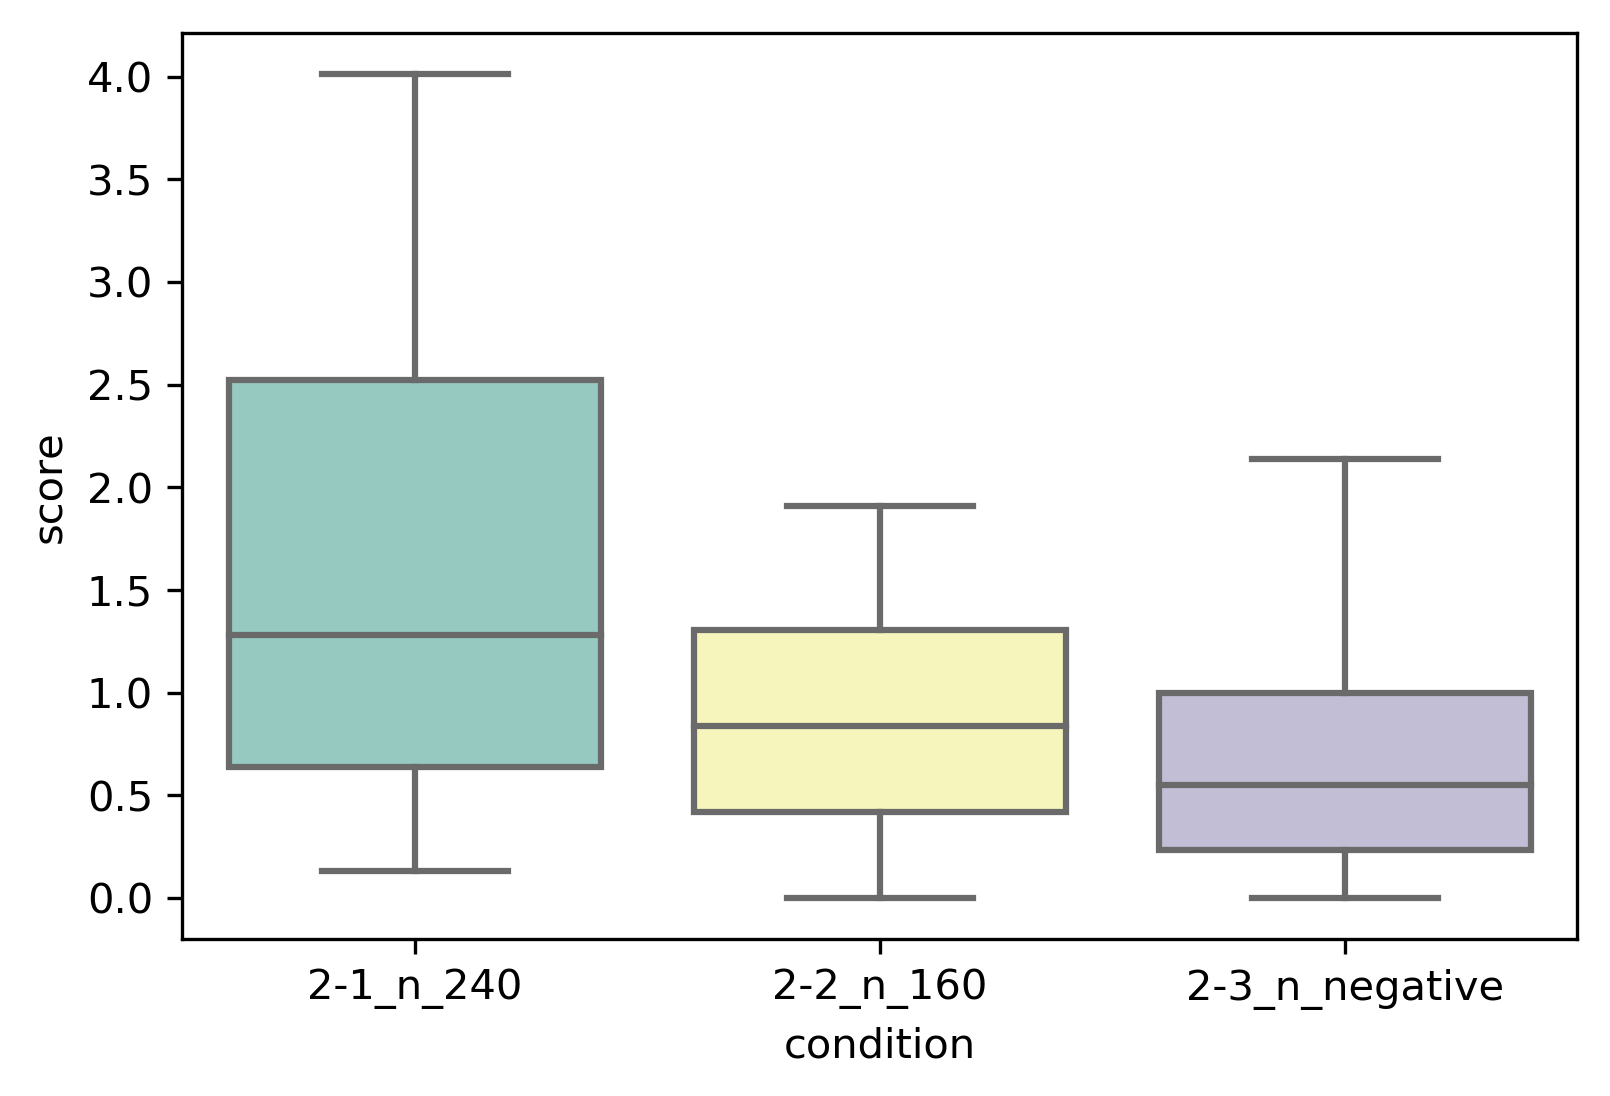

In [92]:
sns.boxplot(x="condition", y="score", data=df_gr2_melt, palette="Set3", showfliers = False)

In [93]:
df_gr3 = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), [df_list[6], df_list[7], df_list[8]])
#print (list(df_gr3))
df_gr3 = df_gr3.rename(columns={"#3-1_i_240_n_240_share_elements": "3-1_share_240", "#3-2_i_160_n_160_share_elements": "3-2_share_160", "#3-3_negative_share_elements": "3-3_share_negative"}, errors="raise")
print (df_gr3[["3-1_share_240", "3-2_share_160", "3-3_share_negative"]].describe())
df_gr3_melt = pd.melt(df_gr3, value_vars=["3-1_share_240", "3-2_share_160", "3-3_share_negative"], value_name="score", var_name="condition")


       3-1_share_240  3-2_share_160  3-3_share_negative
count      14.000000      38.000000          209.000000
mean        2.362956       1.624654            0.821782
std         2.189243       1.658184            1.109407
min         0.132719       0.084100            0.000000
25%         0.769158       0.488855            0.224888
50%         1.470342       1.057557            0.529570
75%         3.648471       1.822842            1.000000
max         6.754538       6.754538           10.836653


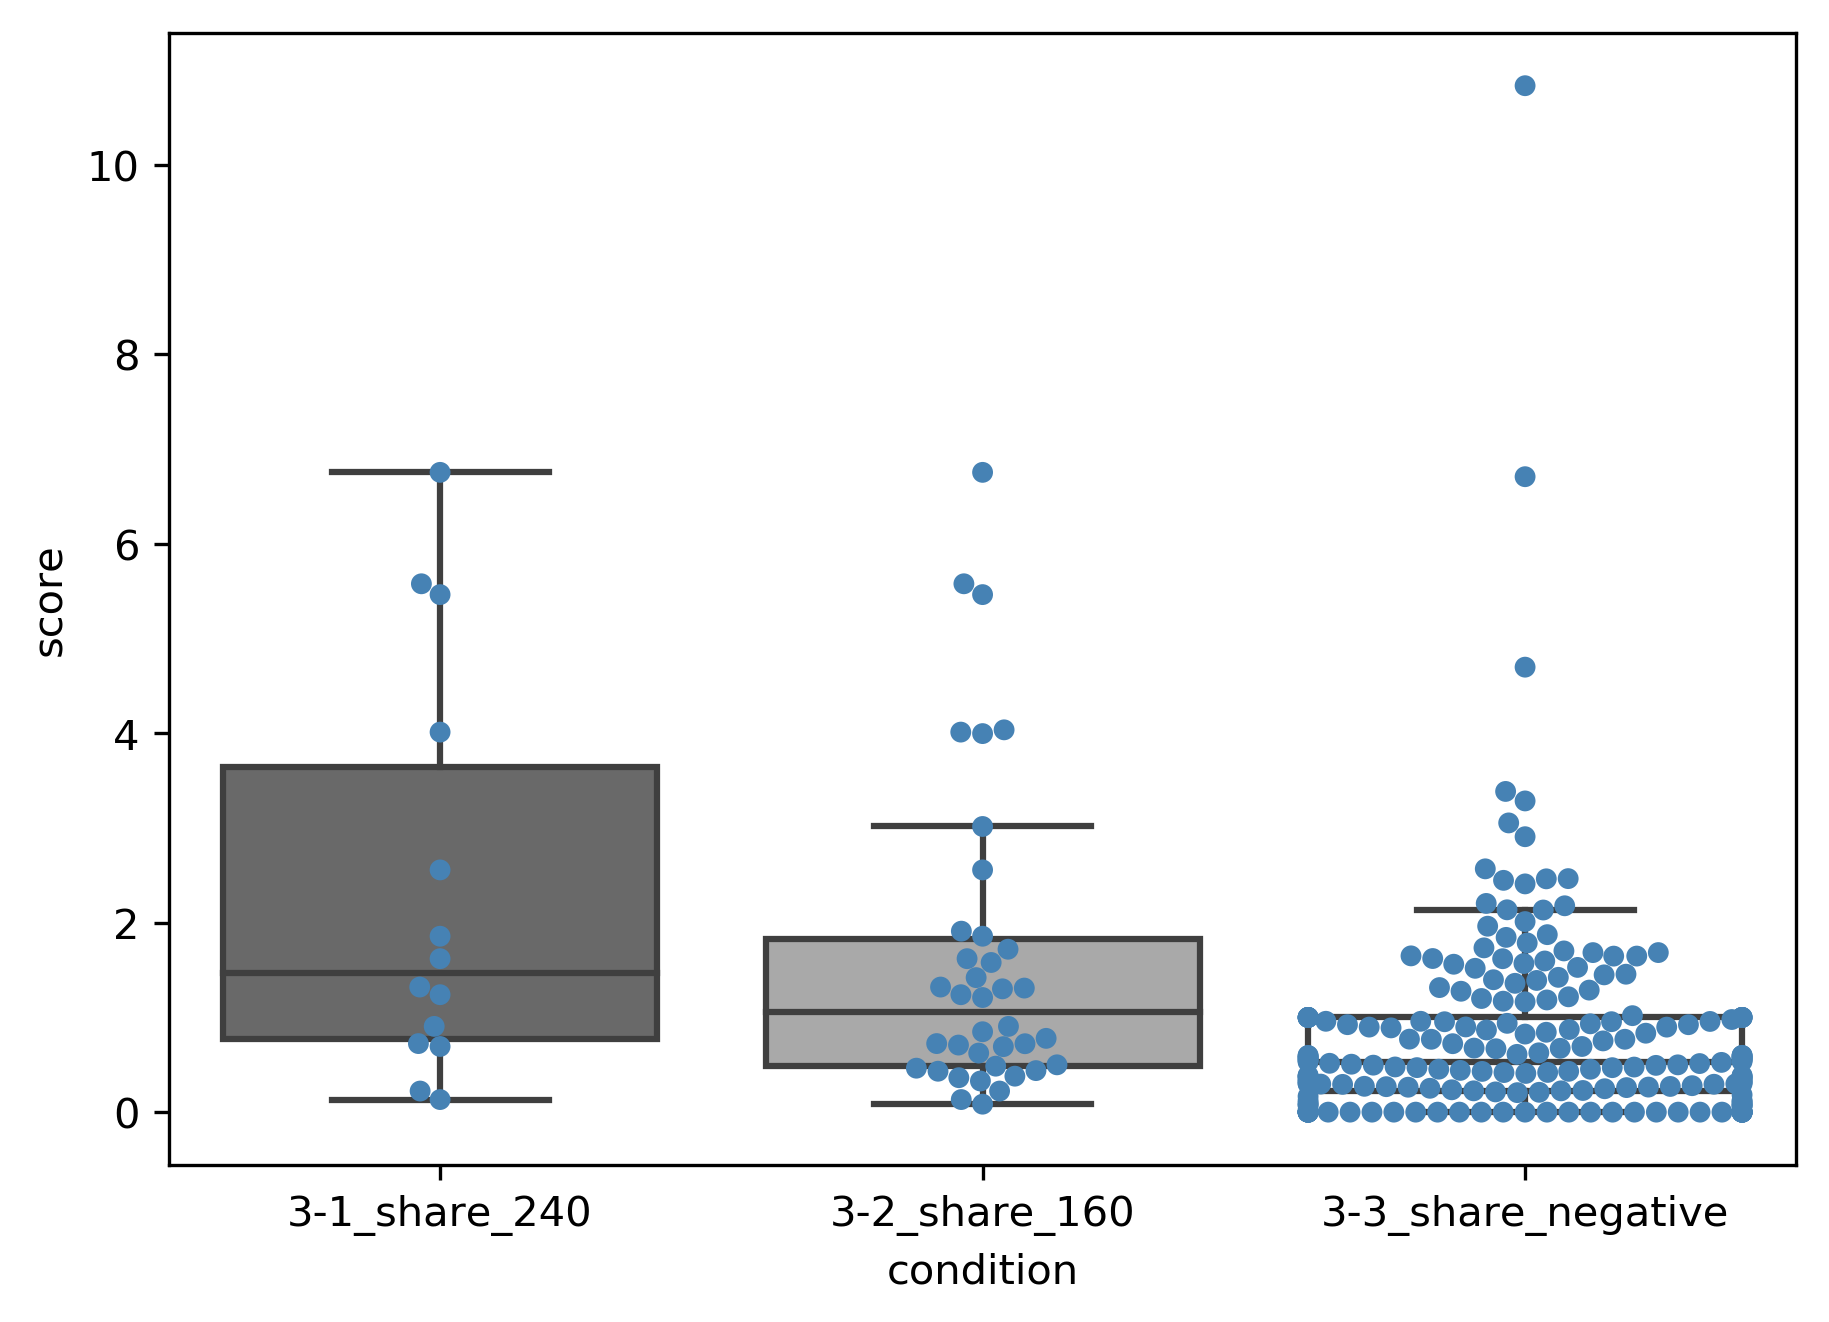

In [95]:
plt.figure(figsize=(7,5))

sns.boxplot(x="condition", y="score", data=df_gr3_melt, palette=["dimgray","darkgray", "white"], showfliers = False)
sns.swarmplot(x="condition", y="score", data=df_gr3_melt, color="steelblue")

plt.savefig(r'C:/Users/libin/UCSF/MECP2/compare_element/1205_H3K27ac/shared_H3K27ac.pdf', transparent=True)   